In [108]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict 

In [220]:
N = 100
V = 200
b = np.zeros(shape=(N,N))
upper_triangle = np.triu_indices(N,1)

indexes = np.arange(0, len(upper_triangle[0]))
indexes = np.random.choice(indexes, V, replace=False)

for i in indexes:
    idx1 = upper_triangle[0][i]
    idx2 = upper_triangle[1][i]
    b[idx1,idx2] = 1

adj_matrix = (b + b.T)

In [221]:
adj_list = defaultdict(list)

for i in range(N):
    for j in range(N):
        adj_list[i].append(j) if adj_matrix[i, j] == 1 else next

In [222]:
num_rows = 2
rand_indexes = np.random.randint(0, N, size=num_rows) 

print('Adjacency matrix rows')
filtered_matrix = adj_matrix[rand_indexes]

for idx in range(num_rows):
    print(f'{rand_indexes[idx]} -> {filtered_matrix[idx]}')

print('\nAdjacency list rows')
for idx in range(num_rows):
    print(f'{rand_indexes[idx]} -> {adj_list[rand_indexes[idx]]}')

Adjacency matrix rows
59 -> [0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
96 -> [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 0.]

Adjacency list rows
59 -> [6, 8, 24, 54, 68, 90]
96 -> [0, 5, 86, 92, 95, 98]


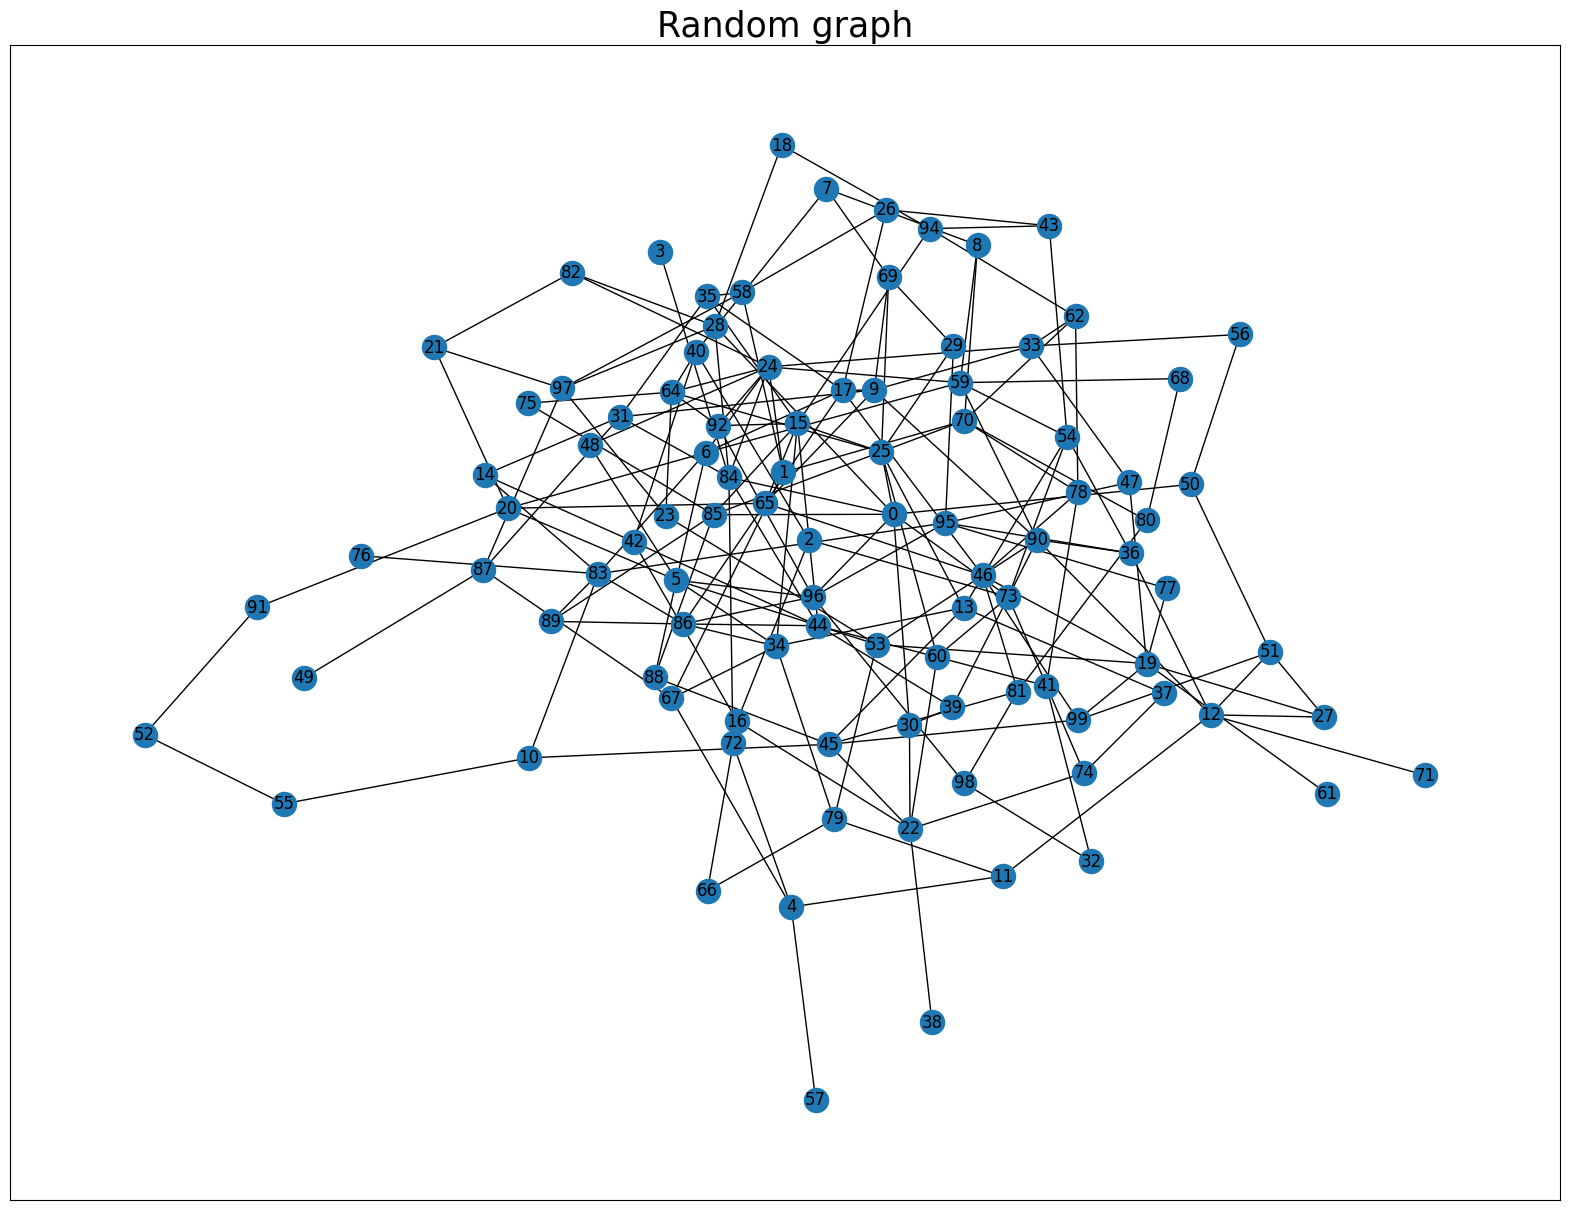

In [223]:
class GraphVisualization:
    def __init__(self, temp):
        self.visual = temp
    def visualize(self):
        G = nx.Graph()
        plt.figure(figsize=(20,15))
        plt.title(f'Random graph', fontsize=25)
        G.add_edges_from(self.visual)
        nx.draw_networkx(G)
        plt.show()


lst = []
for k, v in adj_list.items():
    lst.extend([[k, i] for i in v])
G = GraphVisualization(lst)
G.visualize()

In [224]:
def DFS(visited, graph, node):  #function for dfs 
    if node not in visited:
        visited.add(node)
        for neighbour in graph[node]:
            DFS(visited, graph, neighbour)


def connected_components(adj_list):
    components = []

    for i in range(len(adj_list)):
        visited = set()
        DFS(visited, adj_list,  i)
        components.append(list(visited))
    return components

In [244]:
con_comps = connected_components(adj_list)

num_rows = 2
rand_indexes = np.random.randint(0, N, size=num_rows) 
for i in range(num_rows):
    print(con_comps[rand_indexes[i]])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 98, 99]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 98, 99]


In [246]:
def BFS_SP(graph, start, dist):
    visited = []
     
    queue = [[start]]

    while queue:
        path = queue.pop(0)
        node = path[-1]
         
        if node not in visited:
            neighbours = graph[node]
             
            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)
                 
                if neighbour == dist:
                    print("Shortest path = ", *new_path)
                    return
            visited.append(node)
 

    print("Path doesn't exist")
    return

In [248]:
BFS_SP(adj_list, 1, 99)

Shortest path =  1 70 78 46 99
